# 전략 백테스팅 (단순 이동평균)

In [1]:
from datetime import datetime
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
%matplotlib inline

In [2]:
class SmaSignal (bt.Signal):
    params = (('period',20),)
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

In [3]:
# data = bt.feeds.YahooFinanceData(dataname='AAPL',fromdata=datetime(2018,1,1),todata=datetime(2018,12,31))

In [4]:
data = bt.feeds.PandasData(dataname=yf.download('AAPL', start=datetime(2018,1,1),end=datetime(2018,12,31), actions=True, auto_adjust=False))

[*********************100%***********************]  1 of 1 completed


In [5]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [6]:
print(f'Starting Portfolio Value : {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolil Value : {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value : 1000.00
Final Portfolil Value : 1002.61


In [40]:
plt.ioff()

In [38]:
%matplotlib inline

<IPython.core.display.Javascript object>


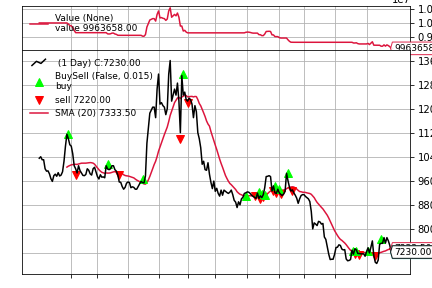

[[<Figure size 432x288 with 2 Axes>]]

In [41]:
cerebro.plot(iplot=True, volume=False)

## 상세 전략 (이동평균)

In [120]:
listStockCode = []
timeBuy = []
timeClose = []
timeDays = []
costBuy = []
result = []

In [8]:
class SmaStrategy(bt.Strategy):
    params = (('ma_period',20),)
    
    def __init__(self):
        self.data_close = self.datas[0].close
        
        self.order = None
        self.price = None
        self.comm = None
        
        # 결과로 사용할 로그
#         global timeBuy
#         global timeClose
#         global result
#         global stock_code
#         global listStockCode
#         global costBuy
#         global data_stock
#         global timeDays
        
        # 사용할 지표
        self.smaBuy = bt.ind.SMA(self.datas[0], period=self.params.ma_period)
#         self.smaSell = bt.ind.SMA(self.datas[0], period=self.params.ma_sell)
        
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
        
    def notify_order(self, order):  # 주문 내용 출력
#         if order.status in [order.Submitted, order.Accepted]:
#             return
        
#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log(f'Buy Executed -- Price : {order.executed.price:.2f}, Cost : {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
# #                 listStockCode.append(stock_code)
# #                 timeBuy.append(self.datas[0].datetime.date(0).isoformat())
# #                 costBuy.append(f'{order.executed.value:.2f}')
#                 self.price = order.executed.price
#                 self.comm = order.executed.comm
#             else:
#                 self.log(f'Sell Executed -- Price : {order.executed.price:.2f}, Cost : {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
# #                 timeClose.append(self.datas[0].datetime.date(0).isoformat())
# #                 timeDays.append(len(data_stock.loc[timeBuy[-1]:timeClose[-1],]))
#             self.bar_executed = len(self)
#         elif order.status in [order.Canceled, order.Margin, order.Rejected]:
#             self.log('Order Failed')
        self.order = None
        
#     def notify_trade(self, trade):  # 주문 결과 출력
#         if not trade.isclosed:
#             return
#         self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
#         result.append(f'{trade.pnlcomm:.2f}')
        
    def next(self): #주문 생성
        if self.order:
            return
        if not self.position:
            if self.data_close[0] > self.smaBuy[0]:
                self.log(f'Buy created -- Price : {self.data_close[0]:.2f}')
                self.order = self.buy(size=10)
        else:
            if self.data_close[0] < self.smaBuy[0]:
                self.log(f'Sell created -- Price : {self.data_close[0]:.2f}')
                self.order = self.sell(size=10)
    def stop(self):
        self.log(f'(ma_period = {self.params.ma_period:2d}) --- Terminal Value: {self.broker.getvalue():.2f}') 

In [4]:
# data_stock = yf.download('005960.KS', start=datetime(2018,1,1),end=datetime(2018,12,31), actions=True, auto_adjust=False)

stock_code = '005960'
data_stock = fdr.DataReader(stock_code, start=datetime(2018,1,1),end=datetime(2018,12,31))
data = bt.feeds.PandasData(dataname=data_stock)

In [9]:
cerebro = bt.Cerebro(stdstats = False)
# 
cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission = 0.003)
cerebro.addstrategy(SmaStrategy)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [10]:
print(f'Starting Portfolio Value : {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolil Value : {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value : 10000000.00
2018-01-29, Buy created -- Price : 11150.00
2018-02-05, Sell created -- Price : 10100.00
2018-03-12, Buy created -- Price : 10100.00
2018-03-22, Sell created -- Price : 9790.00
2018-04-13, Buy created -- Price : 9580.00
2018-05-24, Sell created -- Price : 12250.00
2018-05-28, Buy created -- Price : 13100.00
2018-05-31, Sell created -- Price : 12300.00
2018-07-30, Buy created -- Price : 9180.00
2018-08-07, Sell created -- Price : 9080.00
2018-08-10, Buy created -- Price : 9190.00
2018-08-13, Sell created -- Price : 9010.00
2018-08-14, Buy created -- Price : 9100.00
2018-08-16, Sell created -- Price : 9040.00
2018-08-17, Buy created -- Price : 9140.00
2018-08-27, Sell created -- Price : 9260.00
2018-08-28, Buy created -- Price : 9430.00
2018-08-29, Sell created -- Price : 9200.00
2018-08-31, Buy created -- Price : 9320.00
2018-09-03, Sell created -- Price : 9200.00
2018-09-10, Buy created -- Price : 9850.00
2018-09-13, Sell created -- Price : 9260.0

In [11]:
cerebro = bt.Cerebro(stdstats = False)
# 
cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission = 0.003)
cerebro.optstrategy(SmaStrategy, ma_period=range(10,31))
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [ ]:
cerebro.run()

In [ ]:
cerebro.plot(iplot=True,volume=True)

In [139]:
listStockCode = []
timeBuy = []
timeClose = []
timeDays = []
costBuy = []
result = []
for stock_code in ['005960','000660']:
    data_stock = fdr.DataReader(stock_code, start=datetime(2018,1,1),end=datetime(2018,12,31))
    data = bt.feeds.PandasData(dataname=data_stock)
    
    cerebro = bt.Cerebro(stdstats = False)

    cerebro.adddata(data)
    cerebro.broker.setcash(10000000)
    cerebro.broker.setcommission(commission = 0.003)
    cerebro.addstrategy(SmaStrategy)
    cerebro.addobserver(bt.observers.BuySell)
    cerebro.addobserver(bt.observers.Value)
    cerebro.run()

In [ ]:
import pandas as pd
dfResult = pd.DataFrame({'stock_code':listStockCode,'buy':timeBuy,'close':timeClose,'days':timeDays,'cost':costBuy,'result':result})
dfResult['result'] = pd.to_numeric(dfResult['result'])
dfResult['cost'] = pd.to_numeric(dfResult['cost'])

## 최적화

In [ ]:
from datetime import datetime
import backtrader as bt

# Create a Stratey
class SmaStrategy(bt.Strategy):
    params = (('ma_period', 20),)

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close

        # keep track of pending orders
        self.order = None

        # add a simple moving average indicator
        self.sma = bt.ind.SMA(self.datas[0], period=self.params.ma_period)

    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        # set no pending order
        self.order = None

    def next(self):
        # do nothing if an order is pending
        if self.order:
            return

        # check if there is already a position
        if not self.position:
            # buy condition
            if self.data_close[0] > self.sma[0]:
                self.order = self.buy()
        else:
            # sell condition
            if self.data_close[0] < self.sma[0]:
                self.order = self.sell()

    def stop(self):
        self.log(f'(ma_period = {self.params.ma_period:2d}) --- Terminal Value: {self.broker.getvalue():.2f}')

# download data
stock_code = '005960'
data_stock = fdr.DataReader(stock_code, start=datetime(2018,1,1),end=datetime(2018,12,31))
data = bt.feeds.PandasData(dataname=data_stock)

# create a Cerebro entity
cerebro = bt.Cerebro(stdstats = False)

# set up the backtest
cerebro.adddata(data)
cerebro.optstrategy(SmaStrategy, ma_period=range(10, 31))
cerebro.broker.setcash(1000.0)
cerebro.run(maxcpus=4)

## 상세 전력 (볼린저 밴드)

In [1]:
import backtrader as bt
import datetime
import pandas as pd

In [2]:
class BBand_Strategy (bt.Strategy):
    params = (('period',20),('devfactor',2.0),)
    def __init__(self):
        # 시계열에서 종가 추적
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open
        # 주문/매수 주가/매수 커미션을 추적
        self.order = None
        self.price = None
        self.comm = None
        # 볼린저 밴드를 추가하고 매수/매도 신호를 추적
        self.b_band = bt.ind.BollingerBands(self.datas[0],
                                            period = self.p.period,
                                            devfactor = self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0],
                                           self.b_band.lines.bot)
        self.sell_signal = bt.ind.CrossOver(self.datas[0],
                                            self.b_band.lines.top)
        
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'Buy Executed -- Price : {order.executed.price:.2f}, Cost : {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'Sell Executed -- Price : {order.executed.price:.2f}, Cost : {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Failed')
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
        
    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                size = int(self.broker.getcash() * 0.997 / self.datas[0].open) #commission 발생분만큼 미리 빼주지 않으면 거래가 안됨.
                self.log(f'Buy Created --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                self.log(f'Sell Created --- Size: {self.position.size}')
                self.sell(size = self.position.size)

In [3]:
# stock_code = '069500' # kodex200
import FinanceDataReader as fdr
stock_code = '005930'
data_stock = fdr.DataReader(stock_code, start=datetime.datetime(2018,1,1),end=datetime.datetime(2018,12,31))
data = bt.feeds.PandasData(dataname=data_stock)

In [8]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
# 
cerebro.addstrategy(BBand_Strategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission = 0.003)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

In [9]:
print(f'Starting Portfolio Value : {cerebro.broker.getvalue():.2f}')
backtest_result = cerebro.run()
print(f'Final Portfolil Value : {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value : 10000000.00
2018-02-13, Buy Created --- Size: 215, Cash: 10000000.00, Open: 46200.0, Close: 47540.0
2018-02-13, Buy Executed -- Price : 46200.00, Cost : 9933000.00,Commission: 29799.00
2018-03-16, Sell Created --- Size: 215
2018-03-16, Sell Executed -- Price : 51220.00, Cost : 9933000.00,Commission: 33036.90
2018-03-16, OPERATION RESULT --- Gross: 1079300.00, Net: 1016464.10
2018-04-06, Buy Created --- Size: 228, Cash: 11016464.10, Open: 48000.0, Close: 48400.0
2018-04-06, Buy Executed -- Price : 48000.00, Cost : 10944000.00,Commission: 32832.00
2018-04-23, Sell Created --- Size: 228
2018-04-23, Sell Executed -- Price : 51000.00, Cost : 10944000.00,Commission: 34884.00
2018-04-23, OPERATION RESULT --- Gross: 684000.00, Net: 616284.00
2018-05-17, Buy Created --- Size: 230, Cash: 11632748.10, Open: 50300.0, Close: 49400.0
2018-05-17, Buy Executed -- Price : 50300.00, Cost : 11569000.00,Commission: 34707.00
2018-09-04, Sell Created --- Size: 230
2018-09-04, Sell

<IPython.core.display.Javascript object>


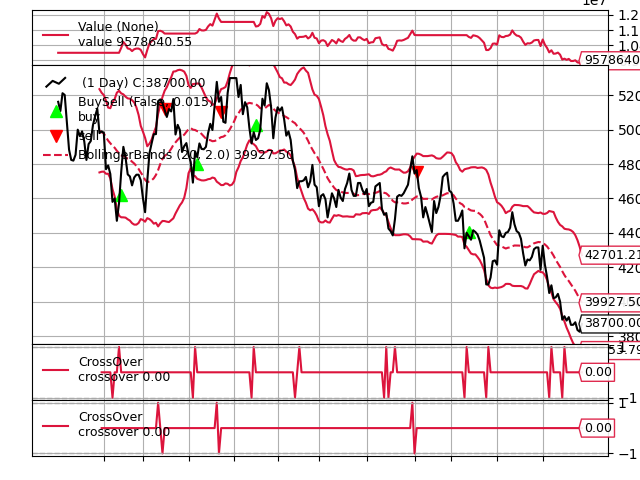

[[<Figure size 640x480 with 4 Axes>]]

In [14]:
cerebro.plot(iplot=True, volume=False)

In [11]:
print(backtest_result[0].analyzers.returns.get_analysis())

OrderedDict([('rtot', -0.043049416091183595), ('ravg', -0.0001764320331605885), ('rnorm', -0.043486974537873514), ('rnorm100', -4.348697453787351)])


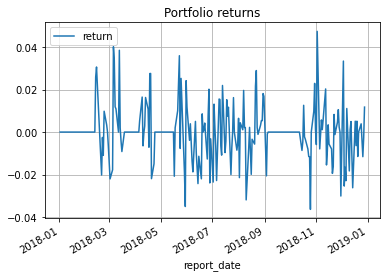

In [13]:
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
return_df = pd.DataFrame(list(returns_dict.items()),
                         columns = ['report_date', 'return']).set_index('report_date')
return_df.plot(title='Portfolio returns', grid=True)

## 상세 전략 (RSI)

In [14]:
from datetime import datetime
import backtrader as bt

In [15]:
class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, rsi_lower=30, rsi_mid=50)

    def __init__(self):

        # add RSI indicator
        rsi = bt.indicators.RSI(period=self.p.rsi_periods,
                                upperband=self.p.rsi_upper,
                                lowerband=self.p.rsi_lower)

        # add RSI from TA-lib just for reference
        bt.talib.RSI(self.data, plotname='TA_RSI')

        # long condition (with exit)
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))

        # short condition (with exit)
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)

In [17]:
import FinanceDataReader as fdr
stock_code = '005930'
data_stock = fdr.DataReader(stock_code, start=datetime(2018,1,1),end=datetime(2018,12,31))
data = bt.feeds.PandasData(dataname=data_stock)

In [21]:
# create a Cerebro entity
cerebro = bt.Cerebro(stdstats = False)

# # set up the backtest
cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(1000000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.run()

<IPython.core.display.Javascript object>


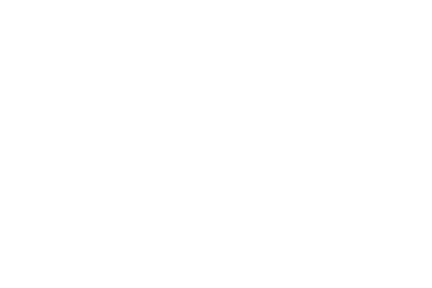

[[<Figure size 432x288 with 4 Axes>]]

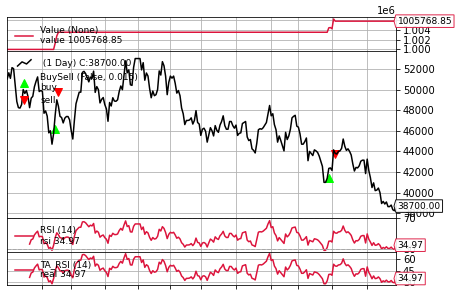

In [22]:
cerebro.plot(iplot=True, volume=False)